In [52]:
import pandas as pd

# Read and store content of an excel file
read_file = pd.read_excel ("Data.xlsx")

# Write the dataframe object into csv file
read_file.to_csv ("Data.csv",
                  index = None,
                  header=True)

# read csv file and convert into a dataframe object
df = pd.DataFrame(pd.read_csv("Data.csv"))
#df.to_csv('98.csv',  index = None)

# show the dataframe
df

,year,f,g,p,o
0,1960,NaN,1.369444e+12,3.031438e+09,3.045939
1,1961,NaN,1.425115e+12,3.072481e+09,2.992537
2,1962,11.510025,1.530069e+12,3.125457e+09,3.038068
3,1963,10.703259,1.648305e+12,3.190564e+09,3.141706
4,1964,10.517353,1.805674e+12,3.256065e+09,3.241921
...,...,...,...,...,...
58,2018,12.952516,8.643942e+13,7.591945e+09,NaN
59,2019,12.334776,8.779853e+13,7.673534e+09,NaN
60,2020,9.170044,NaN,7.820964e+09,NaN
61,2021,11.511183,NaN,7.888161e+09,NaN


In [53]:


df['year'] = pd.to_datetime(df['year'], format='%Y')
#df = df.asfreq('H')
df.set_index('year', inplace=True)
df

,f,g,p,o
year,,,,
1960-01-01,NaN,1.369444e+12,3.031438e+09,3.045939
1961-01-01,NaN,1.425115e+12,3.072481e+09,2.992537
1962-01-01,11.510025,1.530069e+12,3.125457e+09,3.038068
1963-01-01,10.703259,1.648305e+12,3.190564e+09,3.141706
1964-01-01,10.517353,1.805674e+12,3.256065e+09,3.241921
...,...,...,...,...
2018-01-01,12.952516,8.643942e+13,7.591945e+09,NaN
2019-01-01,12.334776,8.779853e+13,7.673534e+09,NaN
2020-01-01,9.170044,NaN,7.820964e+09,NaN


In [54]:

# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the results
missing_values

f    4
g    3
p    0
o    6
dtype: int64

In [3]:
num_zeros = (df == 0).sum()

# Show the number of 0 values in each column
num_zeros


year    0
f       0
g       0
p       0
o       0
dtype: int64

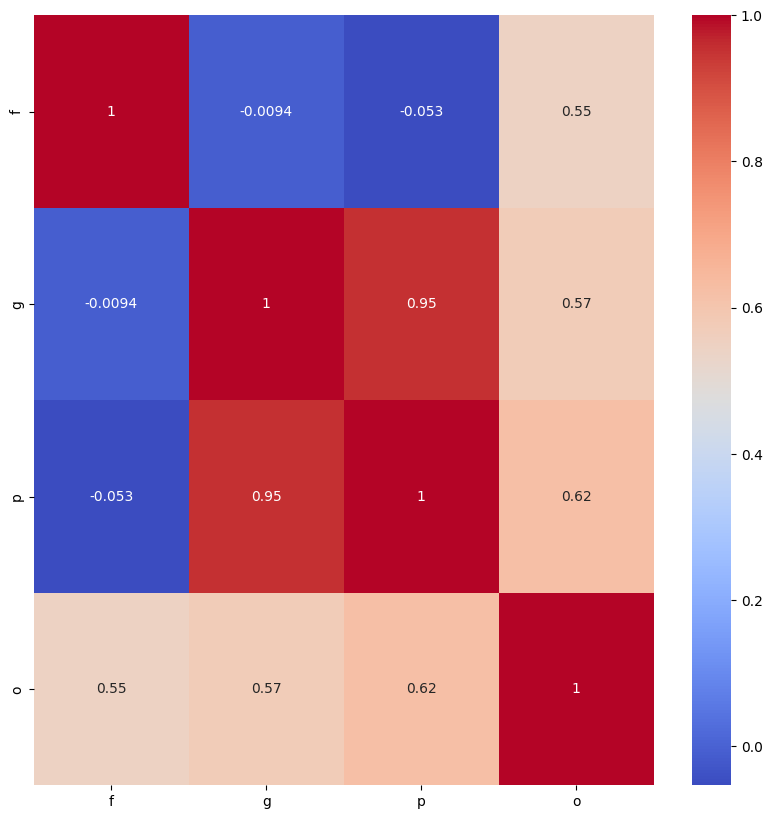

In [14]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt



corrmat =  df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
#plt.xticks(rotation=45)
g=sns.heatmap( df[top_corr_features].corr(),annot=True,cmap="coolwarm")


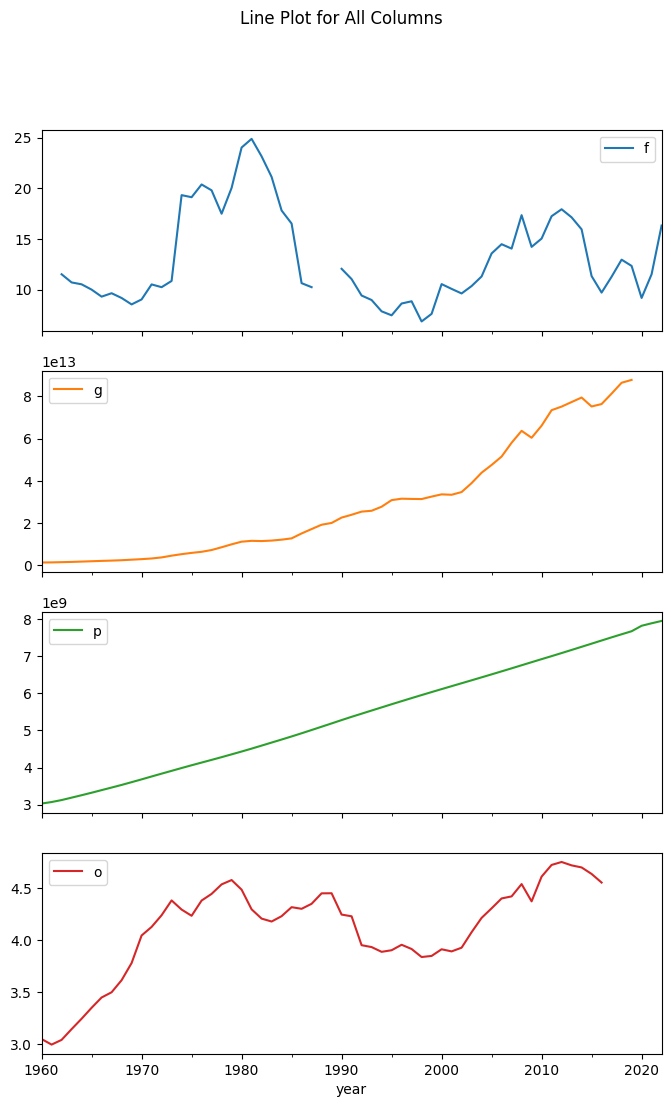

In [56]:
# Create a line plot for each column
df.plot(subplots=True, figsize=(8, 12), title="Line Plot for All Columns")
# Show the plot
plt.show()


# **Missing values**

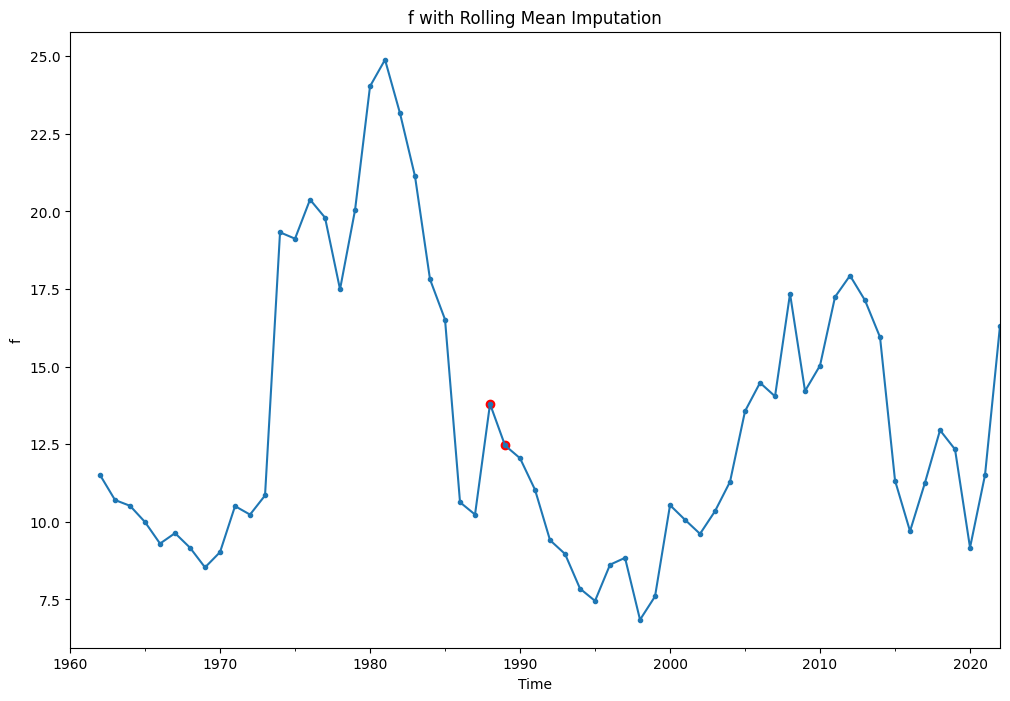

In [57]:
# Make a copy of the original DataFrame
df_copy = df.copy()

# Mark the missing values before imputation
imputed_indices = df_copy[df_copy['f'].isnull()].index


# Apply the rolling mean imputation method
df_copy['f'] = df_copy['f'].fillna(df_copy['f'].rolling(window=4, min_periods=1).mean().shift(1))

# Plot the main line with markers
df_copy['f'].plot(style='.-', figsize=(12,8), title='f with Rolling Mean Imputation')

# Add points where data was imputed with red color
plt.scatter(imputed_indices, df_copy.loc[imputed_indices, 'f'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('f')

plt.show()

In [58]:

# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Print the results
missing_values

f    2
g    3
p    0
o    6
dtype: int64

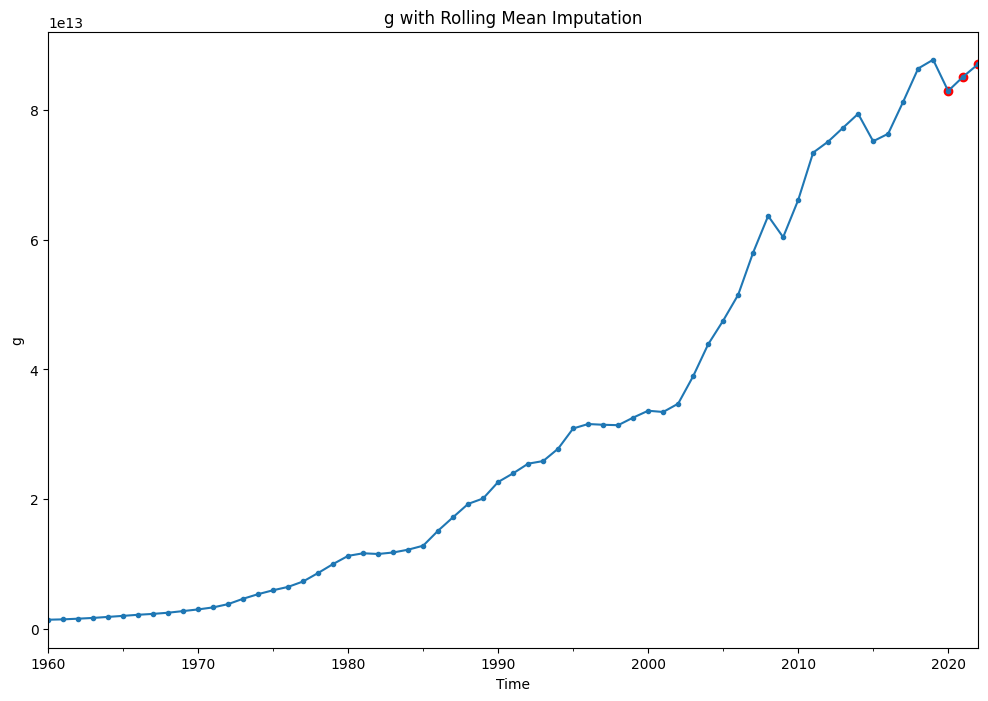

In [59]:
# Make a copy of the original DataFrame
#df_copy = df.copy()

# Mark the missing values before imputation
imputed_indices = df_copy[df_copy['g'].isnull()].index


# Apply the rolling mean imputation method
df_copy['g'] = df_copy['g'].fillna(df_copy['g'].rolling(window=4, min_periods=1).mean().shift(1))

# Plot the main line with markers
df_copy['g'].plot(style='.-', figsize=(12,8), title='g with Rolling Mean Imputation')

# Add points where data was imputed with red color
plt.scatter(imputed_indices, df_copy.loc[imputed_indices, 'g'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('g')

plt.show()

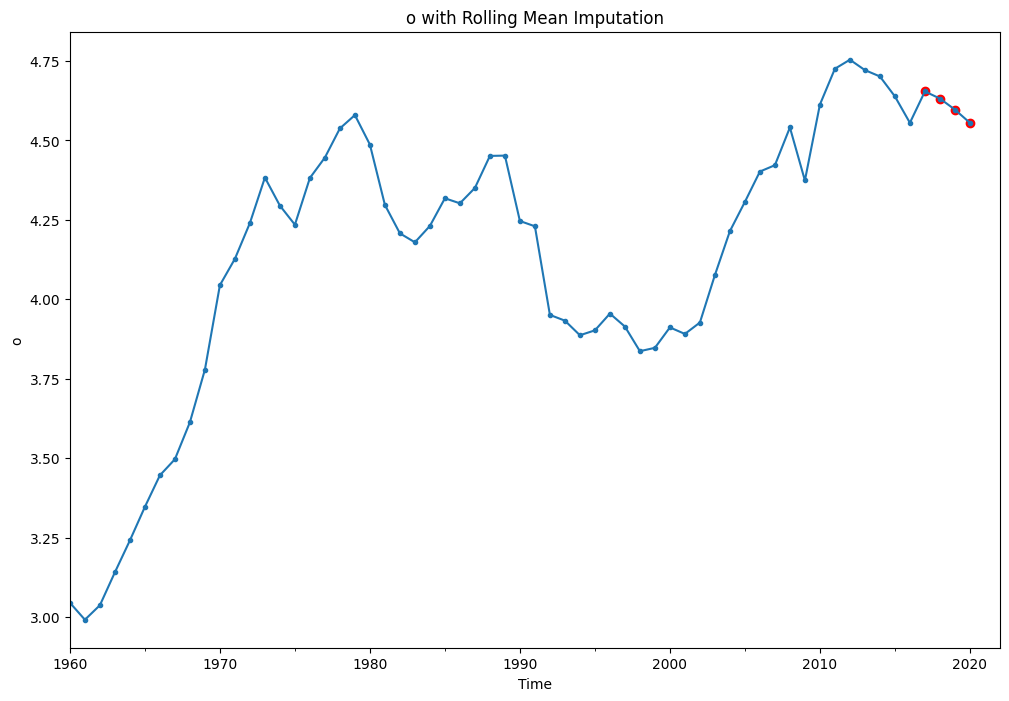

In [60]:
# Make a copy of the original DataFrame
#df_copy = df.copy()

# Mark the missing values before imputation
imputed_indices = df_copy[df_copy['o'].isnull()].index


# Apply the rolling mean imputation method
df_copy['o'] = df_copy['o'].fillna(df_copy['o'].rolling(window=4, min_periods=1).mean().shift(1))

# Plot the main line with markers
df_copy['o'].plot(style='.-', figsize=(12,8), title='o with Rolling Mean Imputation')

# Add points where data was imputed with red color
plt.scatter(imputed_indices, df_copy.loc[imputed_indices, 'o'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('o')

plt.show()

In [61]:

# Check for missing values in each column
missing_values = df_copy.isnull().sum()

# Print the results
missing_values

f    2
g    0
p    0
o    2
dtype: int64

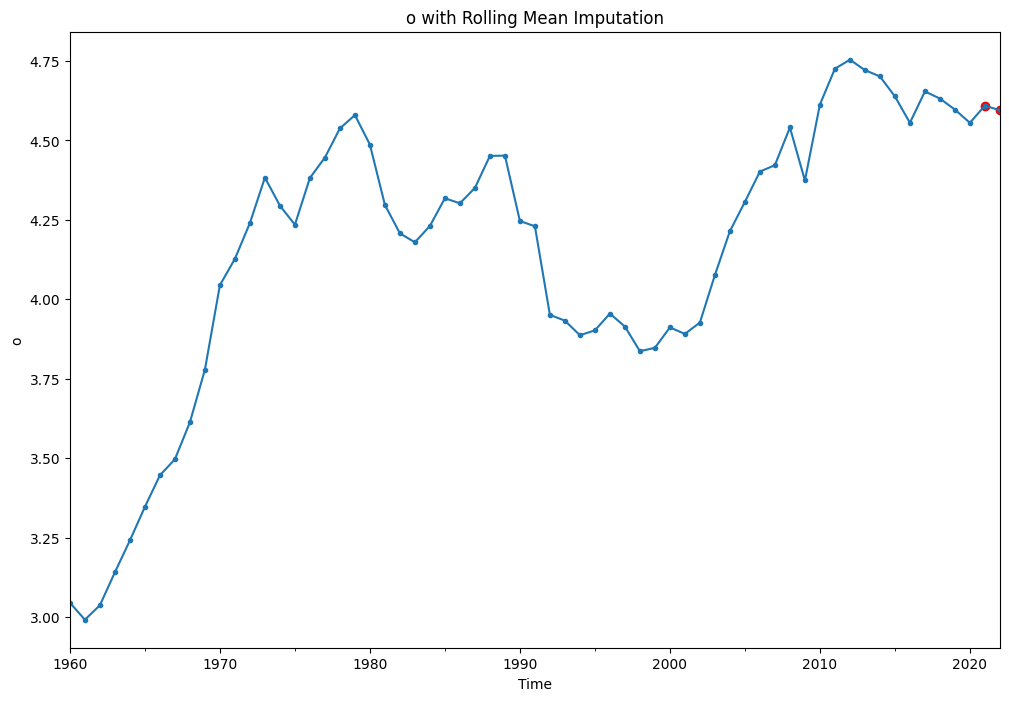

In [62]:
# Make a copy of the original DataFrame
df_copy2 = df_copy.copy()

# Mark the missing values before imputation
imputed_indices = df_copy2[df_copy2['o'].isnull()].index


# Apply the rolling mean imputation method
df_copy2['o'] = df_copy2['o'].fillna(df_copy2['o'].rolling(window=4, min_periods=1).mean().shift(1))

# Plot the main line with markers
df_copy2['o'].plot(style='.-', figsize=(12,8), title='o with Rolling Mean Imputation')

# Add points where data was imputed with red color
plt.scatter(imputed_indices, df_copy2.loc[imputed_indices, 'o'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('o')

plt.show()

In [63]:

# Check for missing values in each column
missing_values = df_copy2.isnull().sum()

# Print the results
missing_values

f    2
g    0
p    0
o    0
dtype: int64

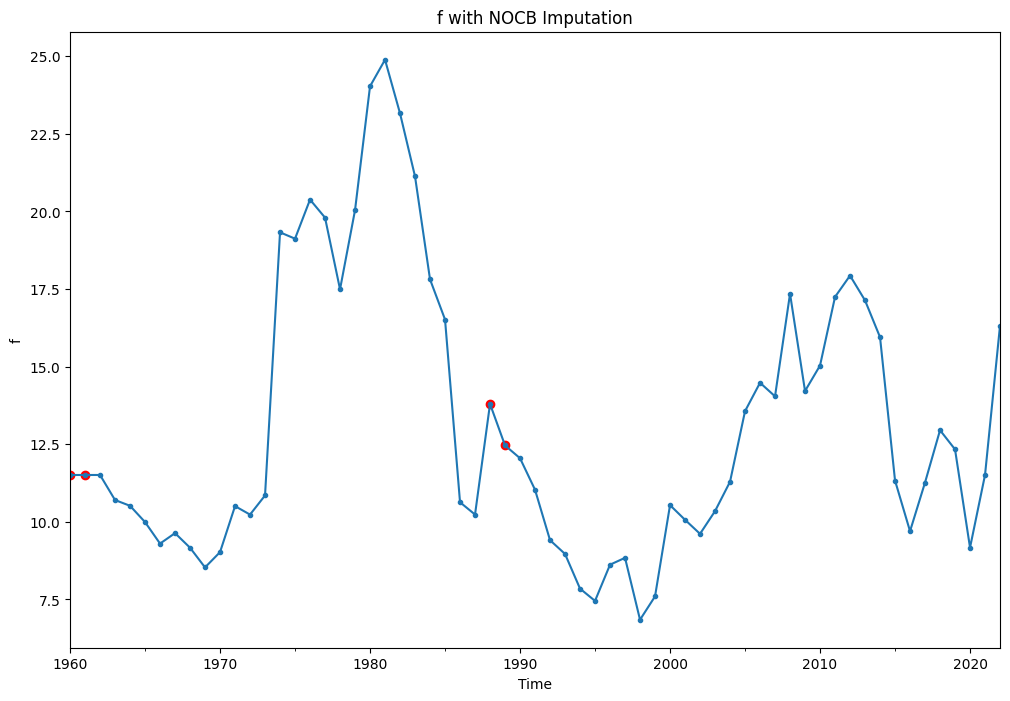

In [64]:
# Apply the backward fill method
df_imputed = df_copy2.fillna(method="bfill")

# Plot the main line with markers
df_imputed['f'].plot(style='.-', figsize=(12,8), title='f with NOCB Imputation')

# Add points where data was imputed with red color
plt.scatter(df_imputed[df['f'].isnull()].index, df_imputed[df['f'].isnull()]['f'], color='red')

# Set labels
plt.xlabel('Time')
plt.ylabel('f')

plt.show()

In [65]:

# Check for missing values in each column
missing_values = df_imputed.isnull().sum()

# Print the results
missing_values

f    0
g    0
p    0
o    0
dtype: int64

In [66]:
newdf3 = df_imputed



# Assuming you have a pandas DataFrame called 'df' with an index column called 'index_col'
newdf3['year'] = newdf3.index  # Create a new column with the index values
newdf3.reset_index(drop=True, inplace=True)  # Remove the index

# Assuming you have a pandas DataFrame called 'df'
last_column = newdf3.columns[-1]  # Get the name of the last column
newdf3 = newdf3[[last_column] + newdf3.columns[:-1].tolist()]

# The last column is now moved to the first position in the DataFrame
newdf3

,year,f,g,p,o
0,1960-01-01,11.510025,1.369444e+12,3.031438e+09,3.045939
1,1961-01-01,11.510025,1.425115e+12,3.072481e+09,2.992537
2,1962-01-01,11.510025,1.530069e+12,3.125457e+09,3.038068
3,1963-01-01,10.703259,1.648305e+12,3.190564e+09,3.141706
4,1964-01-01,10.517353,1.805674e+12,3.256065e+09,3.241921
...,...,...,...,...,...
58,2018-01-01,12.952516,8.643942e+13,7.591945e+09,4.631578
59,2019-01-01,12.334776,8.779853e+13,7.673534e+09,4.596794
60,2020-01-01,9.170044,8.297824e+13,7.820964e+09,4.555239
61,2021-01-01,11.511183,8.518133e+13,7.888161e+09,4.609390


In [68]:
# Assuming you have a pandas DataFrame called 'df'
newdf3.to_csv('project.csv', index=None)